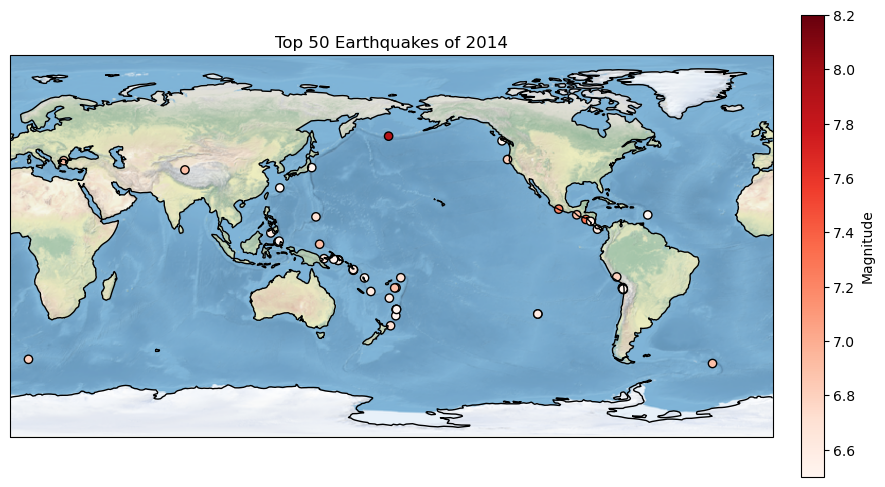

In [3]:
#1
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
#读取文件
ds1=pd.read_csv('usgs_earthquakes.csv')
#提取2014年的地震数据，按升序排序，选择前50个地震
ds1['time']=pd.to_datetime(ds1['time'])
ds1_2014=ds1[(ds1['time']>='2014-01-01 00:00:00')&(ds1['time']<'2015-01-01 00:00:00')]
top50=ds1_2014.sort_values('mag',ascending=False).head(50)
#创建空白画布，添加地图特征和地图背景
fig=plt.figure(figsize=(12, 12))
projection=ccrs.PlateCarree(central_longitude=180)
ax=plt.axes(projection=projection)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.set_global()
ax.stock_img()
#绘制地震点
eqs_sc = ax.scatter(top50['longitude'], top50['latitude'], c=top50['mag'], cmap='Reds', edgecolor='black', transform=ccrs.PlateCarree())
#添加颜色条
cbar = plt.colorbar(eqs_sc,orientation='vertical', pad=0.03, shrink=0.5,label='Magnitude')
#添加标题，并显示图形
plt.title('Top 50 Earthquakes of 2014')
plt.show()

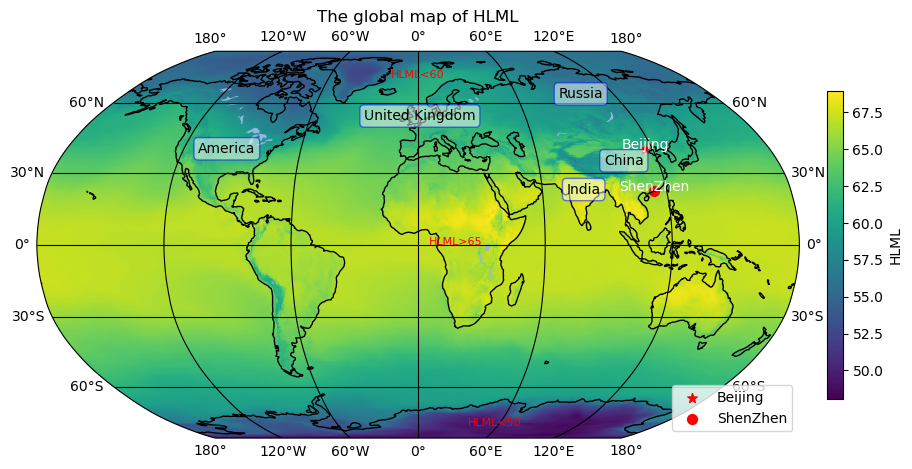

In [5]:
#2.1
import numpy as np
import xarray as xr
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
#读取文件
ds2=xr.open_dataset("MERRA2_400.instU_2d_lfo_Nx.201503.nc4",engine="netcdf4")
HLML=ds2['HLML']
#创建空白画布
fig,ax=plt.subplots(figsize=(12, 8),subplot_kw={'projection': ccrs.Robinson()})
#绘制颜色图
p1= ax.pcolormesh(HLML['lon'], HLML['lat'], HLML.isel(time=10), cmap='viridis', transform=ccrs.PlateCarree())
#添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.set_global()
#添加网格线
ax.gridlines(draw_labels=True,linestyle='-',color='black')
#添加标题
ax.set_title('The global map of HLML')
#添加x和y标签
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
#添加颜色条
cbar = plt.colorbar(p1,ax=ax,orientation='vertical', pad=0.03, shrink=0.5)
cbar.set_label('HLML')
#在地图上标记城市并添加国家的文本框
countries={'CHN':'China','IND':'India','UK':'United Kingdom','RUS':'Russia','USA':'America'}
coords={'CHN':(35,103),'IND':(23,80),'UK':(54,1),'RUS':(64,100),'USA':(40,-98)}
for country,coord in countries.items():
    lat,lon=coords[country]
    text =coord
    props = dict(boxstyle='round', facecolor='white', edgecolor='blue', alpha=0.5)
    ax.text(lon, lat, text, transform=ccrs.PlateCarree(), fontsize=10, verticalalignment='center', ha='center', bbox=props)
#添加HLML不同区域的注释
ax.annotate('HLML<60',xy=(0.5,0.93),xycoords='axes fraction',fontsize=8,ha='center',color='red')
ax.annotate('HLML>65',xy=(0.55,0.5),xycoords='axes fraction',fontsize=8,ha='center',color='red')
ax.annotate('HLML<50',xy=(0.6,0.03),xycoords='axes fraction',fontsize=8,ha='center',color='red')
#添加图例
plt.scatter(116.4074, 39.9042,color='red',marker='*',s=50,transform=ccrs.PlateCarree(),label='Beijing')
plt.text(116.4074, 39.9042,'Beijing',color='white',fontsize=10,ha='center',transform=ccrs.PlateCarree())
plt.scatter(114.0669, 22.549,color='red',marker='o',s=50,transform=ccrs.PlateCarree(),label='ShenZhen')
plt.text(114.0669, 22.549,'ShenZhen',color='white',fontsize=10,ha='center',transform=ccrs.PlateCarree())
plt.legend(loc='lower right')
#显示图形
plt.show()

In [4]:
#2.2
#提取中国区域的数据
HLML_CHN=HLML.sel(lat=slice(3.86,53.56),lon=slice(73.5572,135))
#创建空白画布并使用Robinson投影
fig, ax = plt.subplots(figsize=(12, 8), dpi=1000, subplot_kw={'projection': ccrs.PlateCarree()})
#绘制颜色图
p2= ax.pcolormesh(HLML_CHN['lon'], HLML_CHN['lat'], HLML_CHN.isel(time=0),cmap='viridis', transform=ccrs.PlateCarree())
#添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
#添加网格线
ax.gridlines(draw_labels=True,linestyle='-',color='black')
#添加标题
ax.set_title('HLML in the Chinese region')
#添加x和y标签
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
#添加颜色条
cbar = plt.colorbar(p2,ax=ax,orientation='vertical', pad=0.03, shrink=0.5)
cbar.set_label('HLML')
#在地图上标记城市并添加城市的文本框
props = dict(boxstyle='round', facecolor='white', edgecolor='blue', alpha=0.5)
ax.text(115.9928, 29.7121, 'JiuJiang', transform=ccrs.PlateCarree(), fontsize=10, ha='center',color='red', bbox=props)
#添加HLML不同区域的注释
ax.annotate('HLML<58',xy=(0.22,0.58),xycoords='axes fraction',fontsize=10,ha='center',color='red')
ax.annotate('HLML>66',xy=(0.25,0.15),xycoords='axes fraction',fontsize=10,ha='center',color='red')
#添加图例
plt.scatter(116.4074, 39.9042,color='red',marker='*',s=100,transform=ccrs.PlateCarree(),label='Beijing')
plt.text(116.4074, 39.9042,'Beijing',color='white',fontsize=10,ha='center',transform=ccrs.PlateCarree())
plt.scatter(114.0669, 22.549,color='red',marker='o',s=100,transform=ccrs.PlateCarree(),label='ShenZhen')
plt.text(114.0669, 22.549,'ShenZhen',color='white',fontsize=10,ha='center',transform=ccrs.PlateCarree())
plt.legend(loc='lower right')
#显示图形
plt.show()